In [149]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
sbn.set()

import matplotlib.pyplot as plt

In [150]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [151]:
iris = pd.read_csv('iris.csv', header=None)
iris.columns = ['sepalLen','sepalWidth','petalLen','petalWidth','kind']
iris.head()

,sepalLen,sepalWidth,petalLen,petalWidth,kind
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [152]:
setosa = iris[iris.kind == 'Iris-setosa']
setosa.head()

,sepalLen,sepalWidth,petalLen,petalWidth,kind
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [153]:
versicolor = iris[iris.kind == 'Iris-versicolor']
versicolor.head()

,sepalLen,sepalWidth,petalLen,petalWidth,kind
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [154]:
virginica = iris[iris.kind == 'Iris-virginica']
virginica.head()

,sepalLen,sepalWidth,petalLen,petalWidth,kind
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


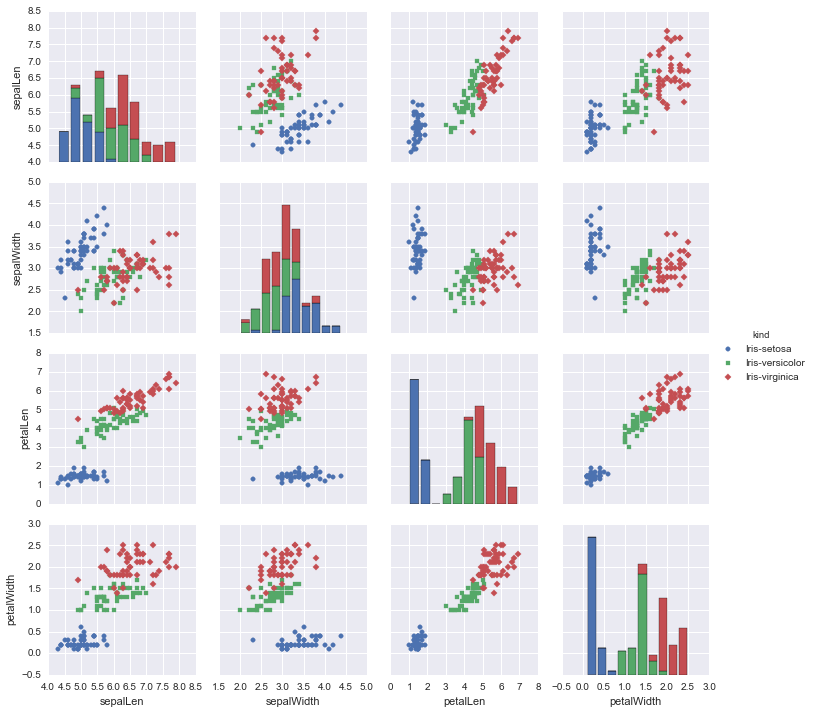

In [155]:
pp = iris[(iris.kind == 'Iris-setosa') | (iris.kind == 'Iris-virginica') | (iris.kind == 'Iris-versicolor')]
sbn.pairplot(pp[['sepalLen','sepalWidth','petalLen','petalWidth', 'kind']], hue='kind', markers=["o", "s", "D"])

In [156]:
# ts = [np.array([1,.2,.1]),np.array([1,.4,.6]),np.array([1,.5,.2]),np.array([1,.7,.9]),np.array([1,.3,.4]), np.array([1,.6,.3]), np.array([1,.8,.1])]
# cls = [1,1,1,-1,1,1,-1]

In [157]:
# from ipywidgets import interact, interactive, fixed
# from IPython.html import widgets


class Perceptron:
    def __init__(self, ts, tc):
        self.trainingSet = ts
        self.classes = tc
        self.weights = np.array([1 for i in range(len(ts[0]))])
        
    def classify(self, x):
        return np.sign(np.dot(x, self.weights))
    
    def learn(self, limit=10000):
        done = False
        count = 0
        bestWeights = self.weights
        minWrong = len(self.trainingSet)
        
        while not done and count < limit: #limit
            count += 1
            self.correct = []
            self.incorrect = []
            
            # First we need to classify all points
            for idx, i in enumerate(self.trainingSet):
                # print(self.classify(i), self.classes[idx])
                if self.classify(i) == self.classes[idx]:
                    self.correct.append(idx)
                else:
                    self.incorrect.append(idx)
                    
            if len(self.incorrect) == 0:
                print("Done learning!", self.weights)
                done = True
            else:
                if len(self.incorrect) < minWrong:
                    #print("Better values for weights have been found!")
                    minWrong = len(self.incorrect)
                    bestWeights = self.weights
                p = random.randrange(len(self.incorrect))
                y = self.trainingSet[self.incorrect[p]]
                self.weights = self.weights + y * self.classes[self.incorrect[p]]
        if not done:
            self.weights = bestWeights
            print("Done learning! Reached the limit.", self.weights)
        self.plot()
        
    def getWeights(self):
        return self.weights
        
    def plot(self):
        cols = []
        xvals = list(map(lambda x: x[1], self.trainingSet))
        cmap = list(map(lambda x: 'red' if x < 0 else 'blue', self.classes))
        plt.scatter(xvals, list(map(lambda x: x[2], self.trainingSet)), c = cmap)
        slope, intcpt = -self.weights[1]/self.weights[2], -self.weights[0]/self.weights[2]
        xvals = np.linspace(min(xvals), max(xvals))
        plt.plot(xvals, slope * xvals + intcpt)
        
# p = Perceptron(ts, cls)
# p.learn()
# interact(p.learn, limit = widgets.widget_int.IntSlider(min=0, max = 10, step = 1, value = 1))

In [165]:
# P1 -> setosa or not?
# p2 -> virginica or versicolor?

# Training data goes into P1, if it is a setosa then we are done. If it is not a setosa it cotinues on to P2.
# Compare vi s ver... If it is a virginica then we are done, if it is a versicolor then we are done.

# Print percent of thhings that are correct.

In [182]:
# Getting some training data, 120 of the 150 
trainingData = iris.iloc[0:150].sample(120)

# Selecting the training categories, returning just the index and the kind
trainingCats = iris.iloc[trainingData.index, 4]

# Getting the data to test against what was learned, getting the 30 that we didn't randomly select above
testData = iris.iloc[0:150].drop(trainingData.index)

# Mapping the values of each type of iris to a value
# trainingCats = trainingCats.map(lambda x: 0 if x == "Iris-setosa" else 1 if x == "Iris-virginica" else 2)

Done learning! [ 1.8  6.9 -9.9 -4. ]


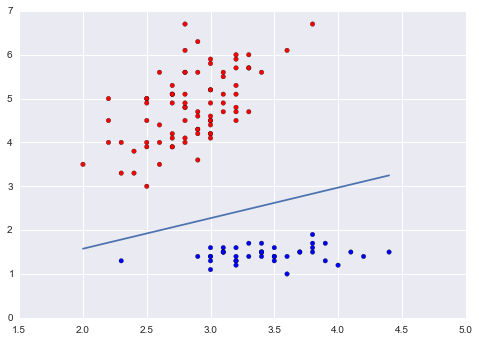

In [183]:
tsP1 = trainingData[['sepalLen', 'sepalWidth', 'petalLen', 'petalWidth']].values

trainingCatsP1 = trainingCats.map(lambda x: 1 if x == "Iris-setosa" else -1)
classifyP1 = trainingCatsP1.values

setosaPerceptron = Perceptron(tsP1, classifyP1)
setosaPerceptron.learn()

Done learning! Reached the limit. [-16.2 -13.5  18.4  27.8]


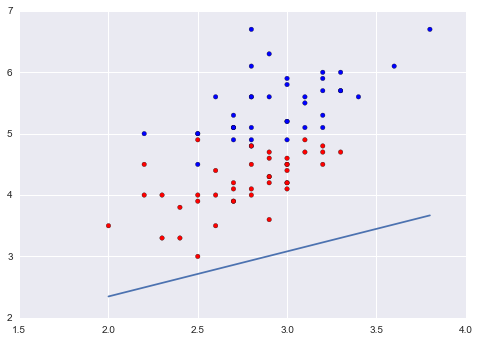

In [184]:
# Get the setosa data from our training data so we can create new training data from our original
# sample for the second perceptron that only relates to versicolor and virginica
setosaData = trainingData[trainingData.kind == 'Iris-setosa']

# Training data that has the versicolor and virginica rows from  original training data
trainingData2 = trainingData.drop(setosaData.index)

# Training categories of versicolor vs virginica
trainingCats2 = iris.iloc[trainingData2.index, 4]

tsP2 = trainingData2[['sepalLen', 'sepalWidth', 'petalLen', 'petalWidth']].values

trainingCatsP2 = trainingCats2.map(lambda x: 1 if x == "Iris-virginica" else -1)
classifyP2 = trainingCatsP2.values

virginicaPerceptron = Perceptron(tsP2, classifyP2)
virginicaPerceptron.learn()

In [185]:
p1Weights = setosaPerceptron.getWeights()
p2Weights = virginicaPerceptron.getWeights()
print(p1Weights, p2Weights)

[ 1.8  6.9 -9.9 -4. ] [-16.2 -13.5  18.4  27.8]


In [186]:
def outerClassify(p1, p2, irisData):
    count = 0
    correct = 0
    
    for idx, row in irisData.iterrows():
        count += 1
        
        currentData = [row.sepalLen, row.sepalWidth, row.petalLen, row.petalWidth]
        currentKind = row.kind
        
        if p1.classify(currentData) == 1:
            if currentKind == "Iris-setosa":
                correct += 1
        else:
            if p2.classify(currentData) == 1:
                if currentKind == "Iris-virginica":
                    correct += 1
            else:
                if currentKind == "Iris-versicolor":
                    correct += 1
                    
    return correct/count
        
        


In [187]:
print("The percentage or correctly classified Iris's was:")
percentage = outerClassify(setosaPerceptron, virginicaPerceptron, testData) * 100
print("%.2f" % percentage)

The percentage or correctly classified Iris's was:
93.33
